In [1]:
import pandas as pd
import sys, os
sys.path.append(os.path.abspath('../Utils'))
from utils_plottingGraph import test_drift_heatmap
from utils_plottingGraph import test_boxplot
from utils_plottingGraph import test_dimRed_plot
from utils_plottingGraph import performance_drift_heatmap
from utils_plottingGraph import print_detection_accuracy

C:\Users\xausa\AppData\Local\Temp\ipykernel_19708\1979964210.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("extended.csv")
# df = pd.read_csv("testResults_heart.csv")

seed_list = [1, 10, 100]

# HEATMAP FOR TESTS

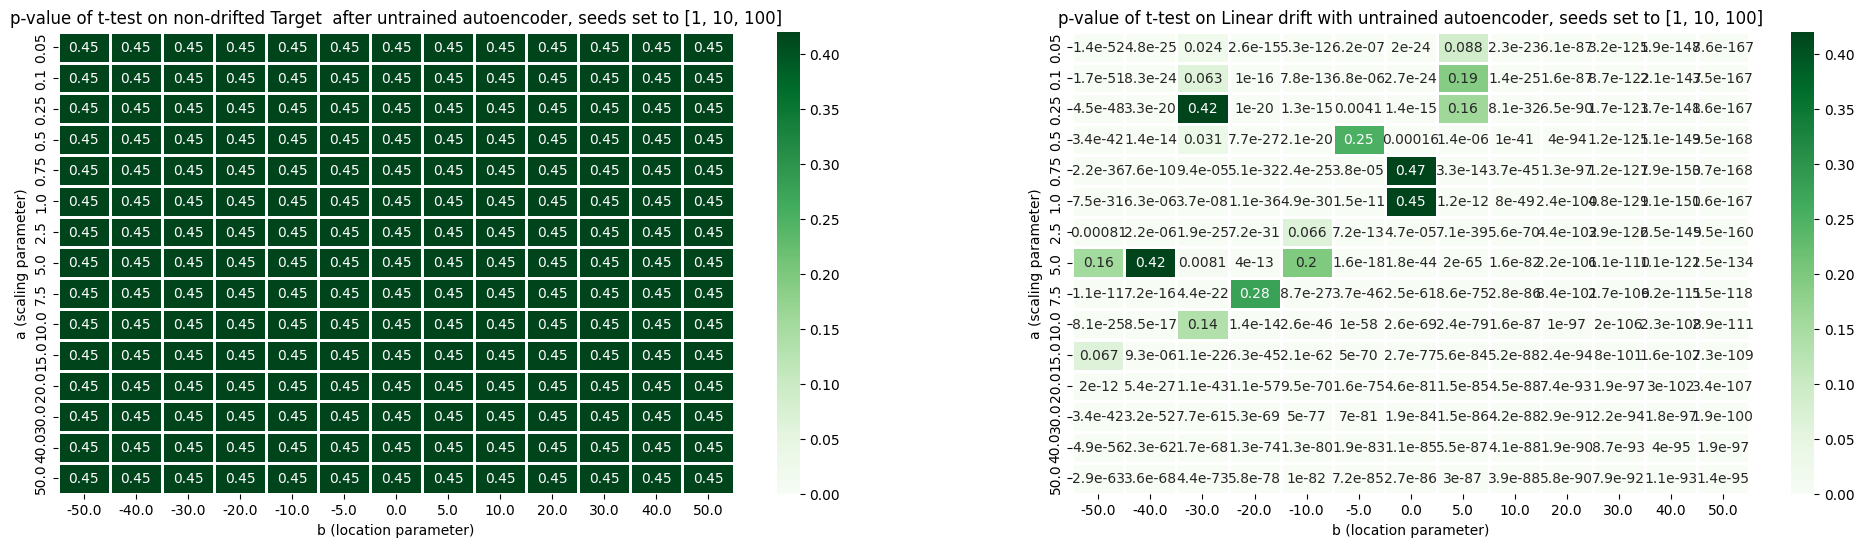

In [3]:
test_drift_heatmap(df, drift='Linear',params=['a', 'b'], dim_red='U_AUTOENCODER', test='ttest', seed_list = seed_list)

# BOXPLOT for TESTS

c:\Users\xausa\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:6988: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df
c:\Users\xausa\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:6988: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df
c:\Users\xausa\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:6988: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df
c:\Users\xausa\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:6988: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df
c:\Users\xausa\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:6988: RuntimeWarning: invalid value encountered in scalar divide
 

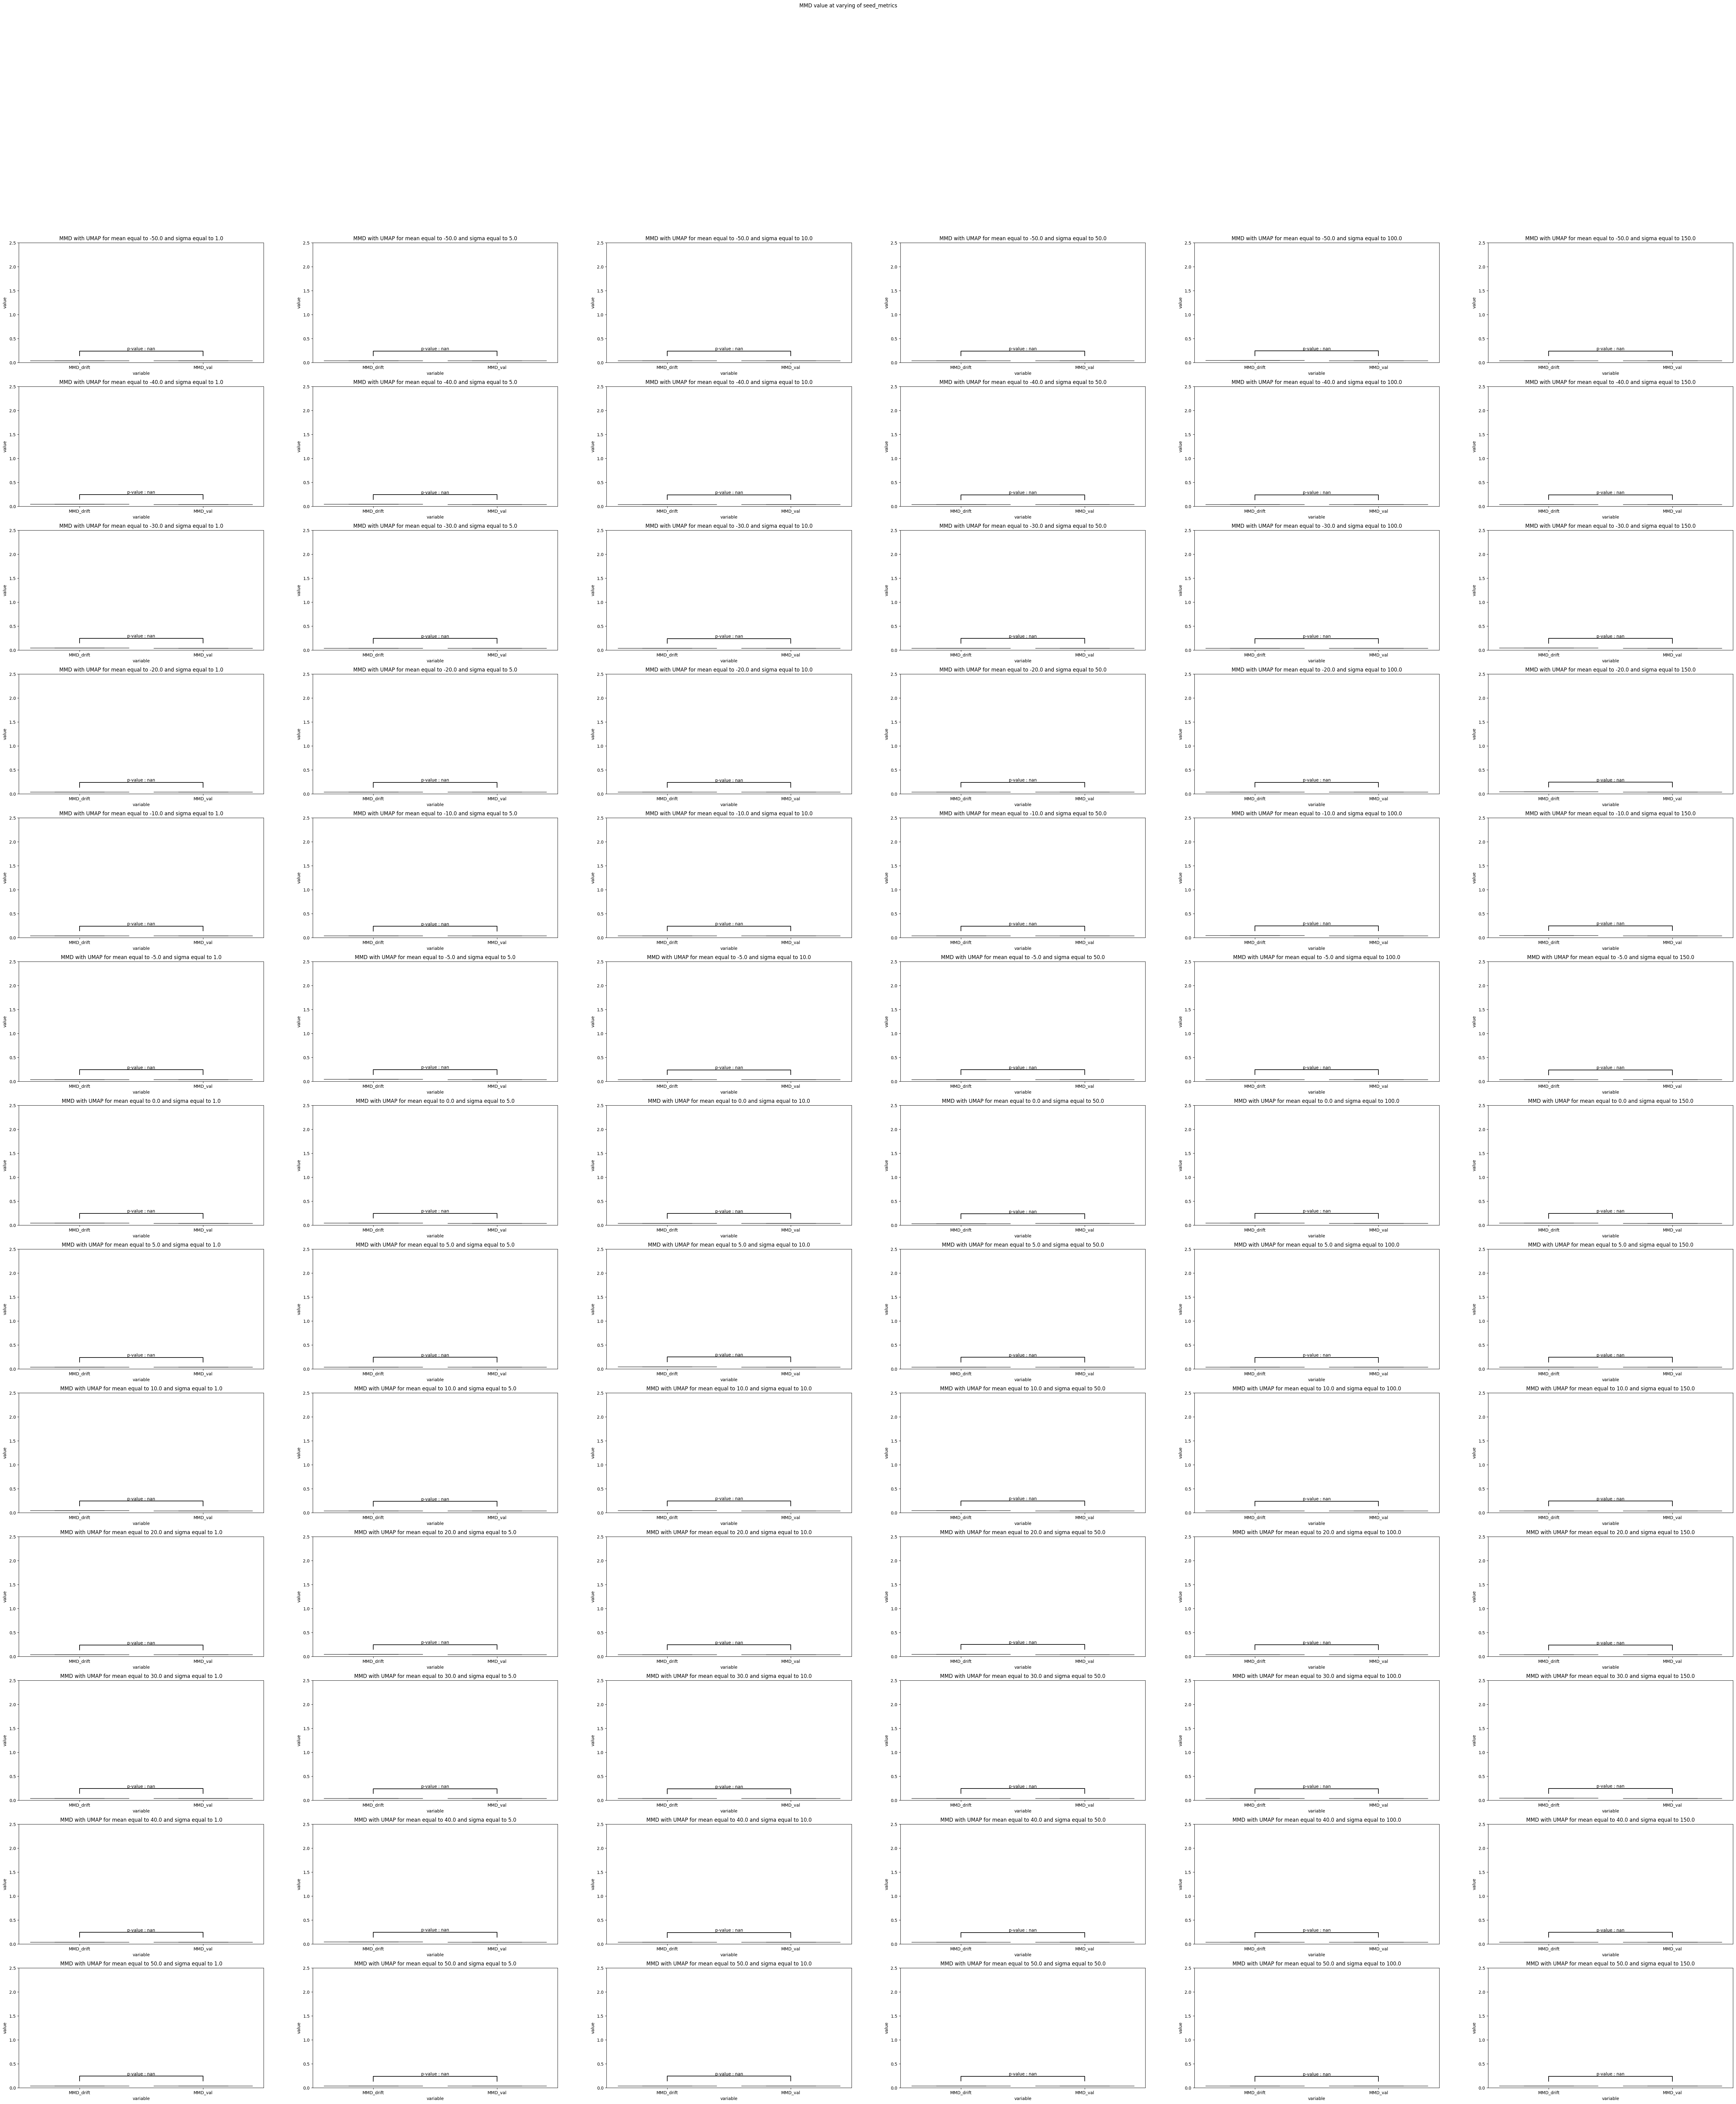

In [4]:
test_boxplot(df, dim_red='UMAP', test='MMD', varying_seed = 'seed_metrics')            #metti p-value incrociato, criterio per vedere che c'è stato drift, da p-value

# GRAPH TEST-PARAMS

In [15]:
# xlim = (-50,50)
xlim = (0,50)

ylim=(0,1)

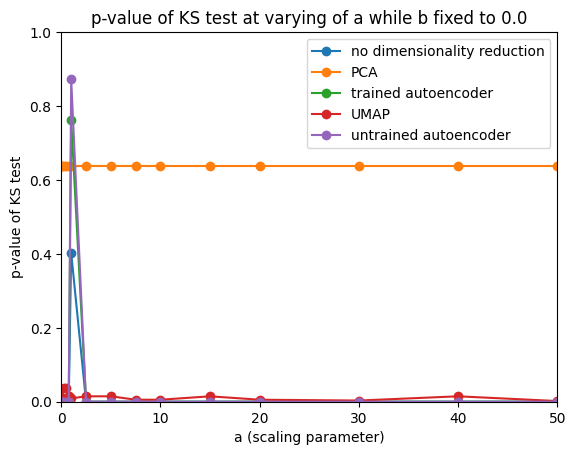

In [16]:
# remember for Linear the transformation is: aX+b
test_dimRed_plot(df, drift='Linear', fixed_param='b', fixed_value=0.0, test='ks', changing_param='a', seed_list = seed_list,xlim=xlim, ylim=ylim) 

# HEATMAP PERFORMANCE

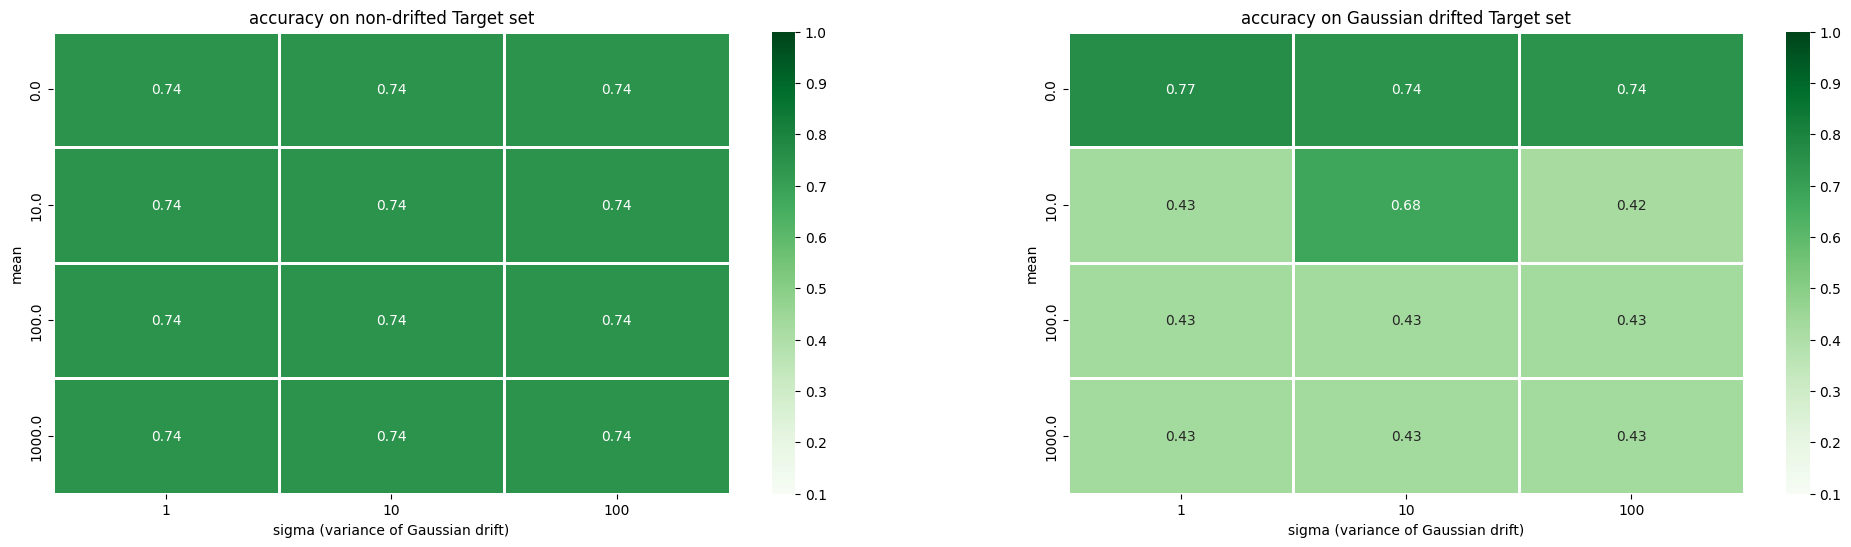

In [5]:
performance_drift_heatmap(df, drift='Gaussian', params=['mean', 'sigma'], seed_list = seed_list) #prova con un seed, prova a vedere heatmap con differenza 

# DETECTION ACCURACY

In [ ]:
thresholdsGaussian = {
    'NO_dim_red' : [0.57, 0.8, 0.08, 0.034],
    'PCA': [0.11, 0.08, 0.38, 0.04],               # numerical thresholds
                'UMAP': [0.03, 0.07, 0.15, 0.08],
                'U_AUTOENCODER': [0.05, 0.12, 0.06, 0.004],
                'T_AUTOENCODER': [0.02, 0.05, 0.07, 0.01]}  
             # prova a vedere con training set o permutation su anche quello
T_permuataions_JustOnTest = [0.12, 0.21, 0.11, 0.02]
thresholds_changeT = {
    'NO_dim_red' : [0.13, 0.23, 0.14, 0.06],
    'PCA': [0.10, 0.14, 0.1, 0.06],               # numerical thresholds
                'UMAP': [0.15, 0.24, 0.17, 0.2],
                'U_AUTOENCODER': [0.05, 0.07, 0.07, 0.004],
                'T_AUTOENCODER': T_permuataions_JustOnTest}
# dovrestsi mettere anche NO_dim_red



drift = 'Gaussian'
seed_metrics = 100

In [ ]:
print_detection_accuracy(df, thresholds=thresholds_changeT, drift='Gaussian', seed_list = seed_list)